## Libraries

In [121]:
#Importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [123]:
#Loading the dataset
data=pd.read_csv("adult.csv")

## Exploratory Data Analysis EDA

In [126]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [128]:
data.shape

(48842, 15)

In [130]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [132]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [134]:
#Check for null values
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [136]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [138]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [140]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [142]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [144]:
print(data.race.value_counts())

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [146]:
print(data['hours-per-week'].value_counts())

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64


### Data Cleaning

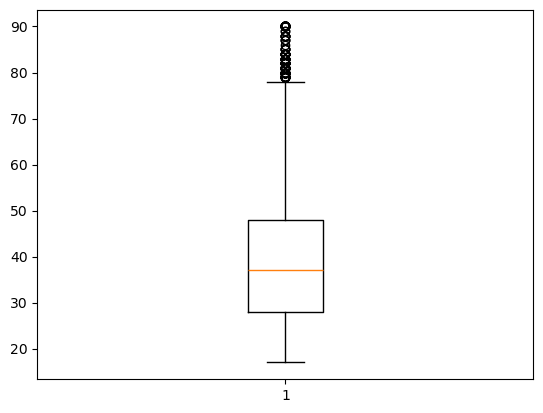

In [149]:
#Outlier Analysis
plt.boxplot(data['age'])
plt.show()

In [151]:
data=data[(data['age']>=17) &(data['age']<=75)]

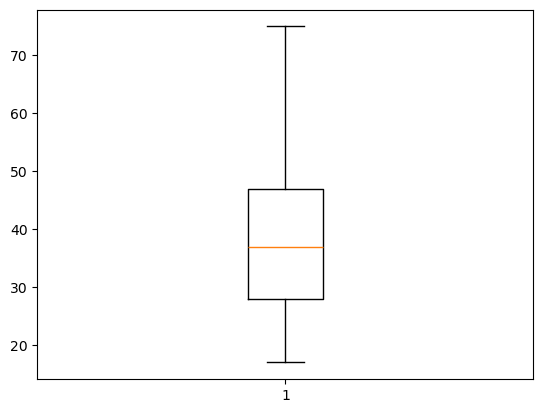

In [153]:
plt.boxplot(data['age'])
plt.show()

Freshers| Experienced| Senior|Retired
-------|----------|---------|------------
20-30|30-50|50-70|>70

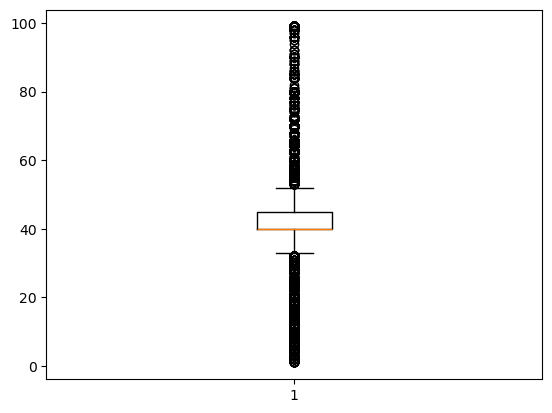

In [156]:
plt.boxplot(data["hours-per-week"])
plt.show()

In [158]:
#Resolving data redundancy
data=data[data["workclass"]!="Never-worked"]
data=data[data["workclass"]!="Without-pay"]

data=data[data["education"]!="Preschool"]
data=data[data["education"]!="1st-4th"]
data=data[data["education"]!="5th-6th"]

data=data.drop(columns=["education"])

In [160]:
#Handling missing values
data.workclass.replace({"?":"others"},inplace=True)
data.occupation.replace({"?":"others"},inplace=True)
data['native-country'].replace({"?":"others"},inplace=True)

C:\Users\NK521WS\AppData\Local\Temp\ipykernel_22048\3868211789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({"?":"others"},inplace=True)
C:\Users\NK521WS\AppData\Local\Temp\ipykernel_22048\3868211789.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [162]:
data.shape
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,others,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Data Transformation

In [165]:
#Encoding
encoder=LabelEncoder()
data["workclass"]=encoder.fit_transform(data["workclass"])
data["marital-status"]=encoder.fit_transform(data["marital-status"])
data["occupation"]=encoder.fit_transform(data["occupation"])
data["relationship"]=encoder.fit_transform(data["relationship"])
data["race"]=encoder.fit_transform(data["race"])
data["gender"]=encoder.fit_transform(data["gender"])
data["native-country"]=encoder.fit_transform(data["native-country"])

### Model Training

In [168]:
#Splitting the data
X=data.drop(columns=["income"])
y=data["income"]

In [170]:
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,4,6,3,2,1,0,0,40,38
1,38,2,89814,9,2,4,0,4,1,0,0,50,38
2,28,1,336951,12,2,10,0,4,1,0,0,40,38
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38
4,18,6,103497,10,4,14,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38


In [172]:
#Normalizing the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Splitting features and target data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23,stratify=y)

In [196]:
#ML Algorithm
result={}
algorithm={
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression(),
    "SVM":SVC()
}
for name,model in algorithm.items():
    pipe=Pipeline([
        ('scaler',StandardScaler()),
        ('model',model)
    ])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc
    print(f"{name} :\tAccuracy:{acc:.3f}")
    print(classification_report(y_test,y_pred))
    

KNN :	Accuracy:0.822
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7206
        >50K       0.65      0.59      0.62      2318

    accuracy                           0.82      9524
   macro avg       0.76      0.74      0.75      9524
weighted avg       0.82      0.82      0.82      9524

Random Forest :	Accuracy:0.850
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7206
        >50K       0.72      0.62      0.67      2318

    accuracy                           0.85      9524
   macro avg       0.80      0.77      0.79      9524
weighted avg       0.84      0.85      0.85      9524

Logistic Regression :	Accuracy:0.822
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7206
        >50K       0.71      0.45      0.55      2318

    accuracy                           0.82      9524
   macro avg       0.78      0.70      

In [180]:
#Boosting Algorithm
import lightgbm as lgb
y_train1 = y_train.replace({'<=50K': 0, '>50K': 1})
y_test1 = y_test.replace({'<=50K': 0, '>50K': 1})

feature_names = ["age","workclass","fnlwgt","educational-num","marital-status","occupation","relationship","race","gender","capital-gain","capital-loss","hours-per-week","native-country"]


train_data = lgb.Dataset(X_train, label=y_train1, feature_name=feature_names)
test_data = lgb.Dataset(X_test, label=y_test1, feature_name=feature_names)
params = {
 'objective': 'binary',
 'metric': 'binary_logloss',
 'is_unbalance': True,
 'boosting_type': 'gbdt',
 'verbosity': -1
 }
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)
 #Model Evaluation and accuracy
y_pred_prob=model.predict(X_test)
y_pred1=(y_pred_prob>=0.5).astype(int)
acc1=accuracy_score(y_test1,y_pred1)
print("LightGBM: \nAccuracy:",acc1)
result["LightGBM"]=acc1

C:\Users\NK521WS\AppData\Local\Temp\ipykernel_22048\4109122609.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train1 = y_train.replace({'<=50K': 0, '>50K': 1})
C:\Users\NK521WS\AppData\Local\Temp\ipykernel_22048\4109122609.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test1 = y_test.replace({'<=50K': 0, '>50K': 1})


LightGBM: 
Accuracy: 0.8231835363292734


### Data Visualization

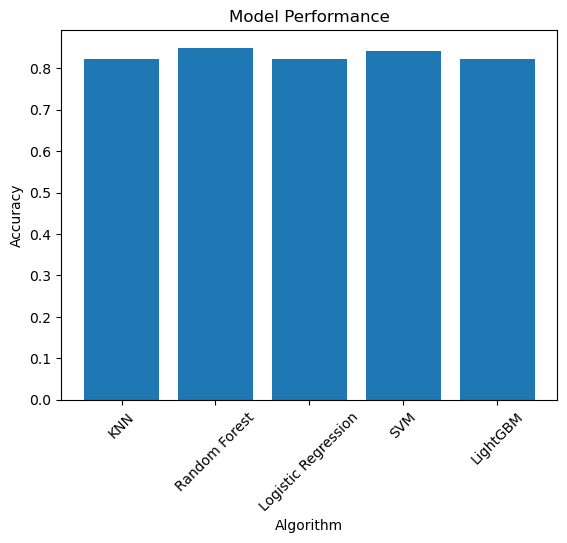

In [182]:
#Model Comparison
plt.bar(result.keys(),result.values())
plt.title("Model Performance")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

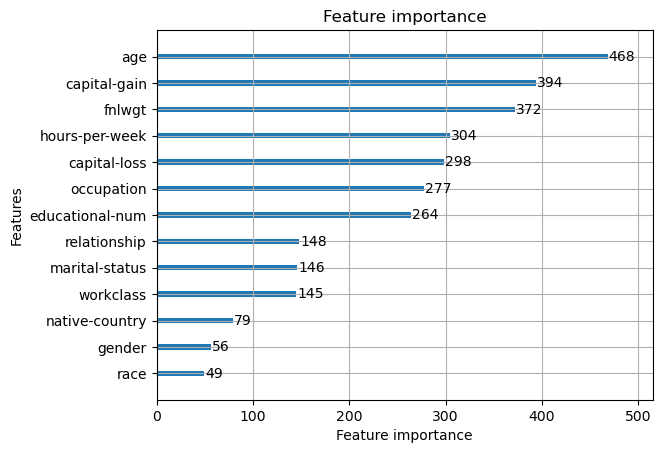

In [186]:
#Feature Importance
lgb.plot_importance(model)
plt.show()

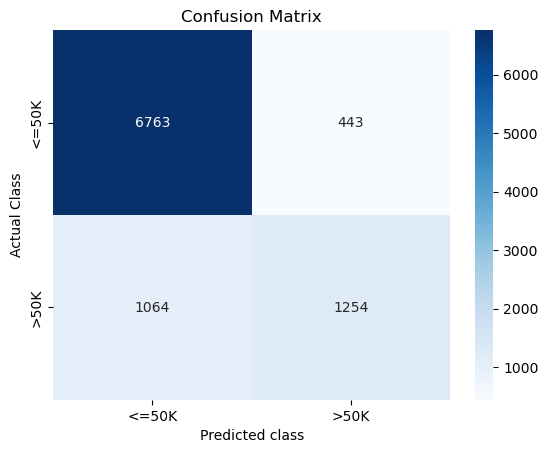

In [188]:
#Confusion Matrix

cm=confusion_matrix(y_test,y_pred,labels=['<=50K','>50K'])

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['<=50K','>50K'],yticklabels=['<=50K','>50K'])
plt.xlabel("Predicted class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

### Saving the model

In [191]:
#Obtaining the best model 
for model,acc in result.items():
    print(f"{model}:{acc:.2f}")

best_model_name = max(result, key=result.get)
best_model = algorithm[best_model_name]

print(f"\nBest model: {best_model_name} with score: {result[best_model_name]:.2f}")
joblib.dump(best_model,'rf_model.pkl')
print("Saved the best model as rf_model.pkl")

KNN:0.82
Random Forest:0.85
Logistic Regression:0.82
SVM:0.84
LightGBM:0.82

Best model: Random Forest with score: 0.85
Saved the best model as rf_model.pkl


### Model Deployment

In [194]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

#loading the trained model
model=joblib.load("rf_model.pkl")

st.set_page_config(page_title="Employee Salary Prediction",page_icon="💼 💵",layout="centered")

st.title("Employee Salary Prediction App")
st.markdown("Predicts whether a person's income is less than $50K or more than $50K, based on input")

st.sidebar.header("Enter employee details")
age=st.sidebar.slider("Age",18,70,35)
educational_num=st.sidebar.selectbox("Education Level",["Bachelors","Masters","PhD","HS-Grad","Assoc","Some-college"])
occupation=st.sidebar.selectbox("Job Role",["Prof-specialty","Craft-repair","Exec-managerial","Adm-clerical","Sales","Other-service",
                                            "Machine-op-inspct","others","Transport-moving", "Handlers-cleaners","Farming-fishing",
                                            "Tech-support","Protective-serv","Priv-house-serv","Armed-Forces"])  
hours_per_week=st.sidebar.slider("Hours-per-week",1,80,40)

#Read input data as a dataframe
df=pd.DataFrame({"age":[age],"education":[educational_num],"occupation":[occupation],"hours-per-week":[hours_per_week]})

#Write the input data
st.write("### Input Data")
st.write(df)

#Prediction
if st.button("Predict salary class:"):
        prediction=model.predict(df)
        st.success(f"Prediction:{prediction[0]}")

Overwriting app.py
